# Network Analysis using NetworkX

## What are Networks (Graphs)?

A graph G is represented by a set of nodes and a set of edges. An edge between two nodes in a graph signifies a relationship between those two nodes. Edges can be directed and undirected.
![title](img/network.png)

# Examples?

![title](img/example.png)

NetworkX uses dictionaries underneath to store node and edge data.
It's dict-o-dict-o-dict-o-dict to be precise.
```
G['node1']
G['node1']['node2']
G['node1']['node2']['some_id']['some_attrb']
```

In [131]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [132]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

In [133]:
# Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

In [134]:
list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)

In [6]:
# Access nodes in a Graph object
G.nodes()

['1', 1, 'second', 2, 3, 'node4']

In [7]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
print(H.nodes())

[0, 1, 2, 3, 4, 5, 6]


In [8]:
G.add_nodes_from(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6]


Difference between `G.add_node(H)` and `G.add_nodes_from(H)`?

In [9]:
G.add_node(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x107648748>]


In [10]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship
# G.add_node(H)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

# Check out edges
G.edges()

[('second', 0), ('second', 'node4'), (2, 3), ('node4', 0), (4, 5)]

In [11]:
# Number of nodes and edges.
print(G.number_of_nodes(), len(G), len(G.nodes()))
print(G.number_of_edges(), len(G.edges()))

11 11 11
5 5


In [12]:
print(G.nodes())
G.remove_node(0)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x107648748>]
['1', 1, 'second', 2, 3, 'node4', 4, 5, 6, <networkx.classes.graph.Graph object at 0x107648748>]


In [13]:
print(G.edges())
G.remove_edge(4, 5)
print(G.edges())

[('second', 'node4'), (2, 3), (4, 5)]
[('second', 'node4'), (2, 3)]


In [14]:
G.clear()
print(G.nodes(), G.edges())

[] []


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


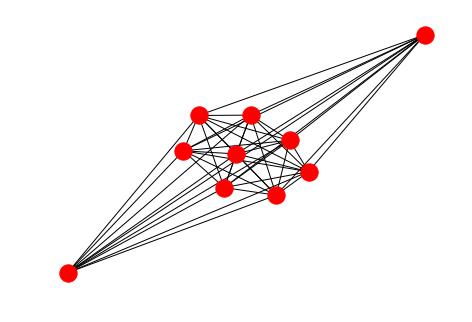

In [15]:
# One more graph generator. This will create
# a Erdos-Reyni Graph
G = nx.erdos_renyi_graph(10, 1.0, seed=1)

# Let's checkout nodes and edges
print(G.nodes())
print(G.edges())
nx.draw(G)

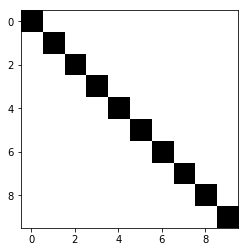

In [16]:
matrix = nx.to_numpy_matrix(G)
# print matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

Adding attributes and weights.

In [17]:
G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

In [18]:
# Adding attributes to graphs, nodes, and edges.
G.graph['attr'] = 'EuroSciPy'

print(G.graph)

G.add_node(1, time='11:00AM')
print(G.nodes())
print(G.nodes(data=True))

{'name': 'complete_graph(10)', 'attr': 'EuroSciPy'}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, {}), (1, {'time': '11:00AM'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


In [19]:
# Accessing the graph dictionary
print('nodes: ', G.nodes())
print('edges: ', G.edges())

print(G[0])
print(G[1])
print(G[1][2])

nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{0: {}, 2: {'weight': 4.7, 'color': 'blue'}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{'weight': 4.7, 'color': 'blue'}


In [20]:
print(G[1])
print(G[1][2])
print(G[1][2]['color'])

{0: {}, 2: {'weight': 4.7, 'color': 'blue'}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{'weight': 4.7, 'color': 'blue'}
blue


### Exercise - 1

In [21]:
G = nx.Graph()
list_of_cities = [('Paris', 'Munich', 841), ('Munich', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

# print G.nodes()
print(G.edges(data=True))
# Iterate through the edges and find the highest weight.

[('Paris', 'Munich', {'weight': 841}), ('Paris', 'Barcelona', {'weight': 1038}), ('Munich', 'Berlin', {'weight': 584}), ('Berlin', 'London', {'weight': 1101})]


In [22]:
result = max([w['weight'] for u, v, w in G.edges(data=True)])
print(result)

# max(G.edges(data=True), key=lambda x:x[2])

1101


### Now let's try to understand the dynamics of a network.

Let's start with a random erdos reyni graph.



In [28]:
G = nx.erdos_renyi_graph(20, 0.2, seed=1)

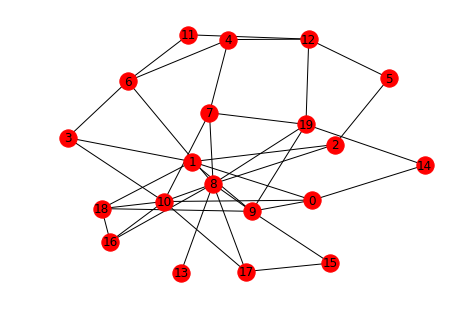

In [29]:
nx.draw(G, with_labels=True)

### Hubs: How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

#### Approach 1: Neighbors

One way we could compute this is to find out the number of people an individual is conencted to. NetworkX let's us do this by giving us a `G.neighbors(node)` function.

In [31]:
# Let's find out the number of neighbors node 12 has
len(G.neighbors(12))

4

In [32]:
G.neighbors(12)

[4, 5, 11, 19]

#### Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a **degree centrality**, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using `nx.degree_centrality(G)`

In [100]:
# nx.degree_centrality(G)
list(nx.degree_centrality(G).items())[0:5]

[(0, 0.1111111111111111),
 (1, 0.2222222222222222),
 (2, 0.3333333333333333),
 (3, 0.1111111111111111),
 (4, 0.0)]

There are other measures of centrality, namely betweenness centrality, flow centrality and load centrality. You can take a look at their definitions on the NetworkX API docs and their cited references. You can also define your own measures if those don't fit your needs, but that is an advanced topic that won't be dealt with here.
The NetworkX API docs that document the centrality measures are here: http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.centrality.html?highlight=centrality#module-networkx.algorithms.centrality

Let's work on a read world network.

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

source: http://snap.stanford.edu/data/index.html#canets

In [34]:
import csv
authors_graph = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [35]:
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


Neighbors of a node.

In [40]:
# Neighbors/ degree of node is one way of calculating the importance
# of the node. Influential nodes.
# print(authors_graph.neighbors('22504'))
# print(len(authors_graph.neighbors('22504')))
# print(nx.degree(authors_graph, nbunch=['22504']))
# print(authors_graph.degree(nbunch=['22504']))

### Exercise - 2

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [41]:
result = [(node, len(authors_graph.neighbors(node))) for node in authors_graph.nodes_iter()]

In [42]:
max(result, key=lambda node:node[1])

('21012', 81)

In [43]:
authors_graph.degree()['21012']
# returns a dictionary of degree keyed by node

81

In [44]:
authors_graph.degree()

{'3466': 8,
 '937': 5,
 '5233': 2,
 '8579': 5,
 '10310': 13,
 '15931': 10,
 '17038': 17,
 '18720': 3,
 '19607': 4,
 '1854': 8,
 '4583': 3,
 '9572': 34,
 '10841': 7,
 '13056': 10,
 '14982': 2,
 '16310': 17,
 '19640': 25,
 '23855': 8,
 '24372': 1,
 '24814': 21,
 '5052': 29,
 '899': 3,
 '1796': 2,
 '2287': 14,
 '3096': 12,
 '3386': 11,
 '4472': 4,
 '5346': 20,
 '5740': 1,
 '6094': 4,
 '6376': 2,
 '9124': 24,
 '10235': 13,
 '10427': 8,
 '10597': 6,
 '15159': 4,
 '16148': 18,
 '16741': 7,
 '18235': 1,
 '18549': 1,
 '19297': 16,
 '20511': 32,
 '20595': 9,
 '20613': 10,
 '24371': 22,
 '24559': 23,
 '24731': 1,
 '25102': 7,
 '25271': 16,
 '25396': 23,
 '1658': 6,
 '4822': 2,
 '6864': 2,
 '7689': 32,
 '7926': 9,
 '10268': 7,
 '12971': 1,
 '18600': 4,
 '20421': 3,
 '20886': 2,
 '21048': 6,
 '22393': 5,
 '23186': 6,
 '23214': 4,
 '23298': 2,
 '23945': 3,
 '24939': 3,
 '339': 30,
 '624': 17,
 '3731': 9,
 '4743': 25,
 '5407': 9,
 '6610': 68,
 '6700': 31,
 '8045': 15,
 '9099': 9,
 '9639': 31,
 '9785

In [45]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

### Exercise - 3

Plot degree centrality of authors_graph.

(count vs degree centrality)

In [106]:
# plt.hist(list(nx.degree_centrality(authors_graph).values()))
# plt.show()

# G = nx.erdos_renyi_graph(1000, 0.9, seed=1)
# plt.hist(list(nx.degree_centrality(G).values()))
# plt.show()

# H = nx.barabasi_albert_graph(1000, 30, 0.3)
# K = nx.powerlaw_cluster_graph(1000, 30, 0.3)

# plt.hist(list(nx.degree_centrality(H).values()))
# plt.show()

# plt.hist(list(nx.degree_centrality(K).values()))
# plt.show()
# nx.betweenness_centrality(authors_graph)

#### Let's have a look at Connected Components of a graph.

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

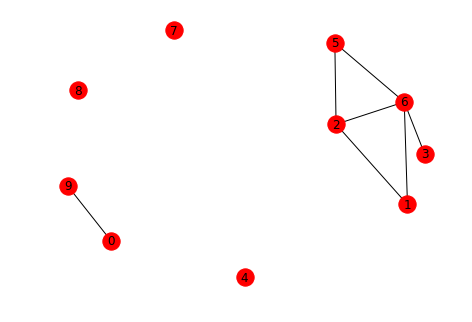

In [91]:
G = nx.erdos_renyi_graph(10, 0.1, seed=1)
nx.draw(G, with_labels=True)

In [92]:
print([len(c) for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)])

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [93]:
graphs = [c for c in sorted(nx.connected_component_subgraphs(authors_graph), key=len, reverse=True)]

In [97]:
len(graphs[10])

8

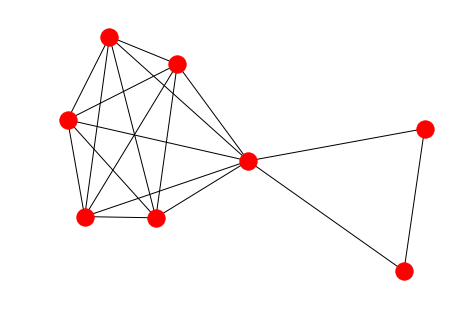

In [96]:
nx.draw(graphs[10])

### Graph Traversal

In [36]:
print(nx.shortest_path(graphs[0], '22504', '23991'))
print(len(nx.shortest_path(graphs[0], '22504', '23991')))
print(nx.shortest_path_length(graphs[0], '22504', '23991'))

['22504', '6512', '18757', '2710', '3677', '23991']
6
5


### Excersise - 4
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph authors_graph, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

Find the average shortest path length in the first component i.e. graphs[0]

HINT: `nx.shortest_path_length`

In [135]:
# G = nx.fast_gnp_random_graph(10000, 0.1, seed=1)

In [107]:
d = {}
for node in authors_graph.nodes():
    try:
        d[node] = nx.shortest_path_length(authors_graph, '22504', node)
    except:
        d[node] = -1

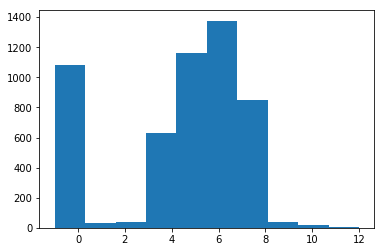

In [108]:
plt.hist(list(d.values()))
plt.show()
# list(d.values())

In [118]:
# print(sum([1 for _, val in d.items() if val == -1]))
# print(len(authors_graph.nodes()) - len(graphs[0]))
# print((sum(val for _, val in d.items() if val != -1))/len(graphs[0]))

1084
1084
5.61014911014911


#### Structures, Cliques in a Network

A subset of nodes which induce a complete subgraph is a clique.

In [136]:
G = nx.complete_graph(5) # In a complete graph all the nodes are connected to each other.
G.add_edge(4, 5)

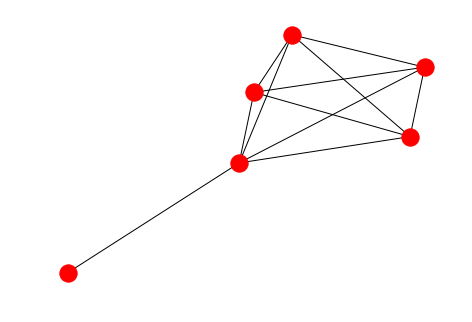

In [137]:
nx.draw(G)

In [121]:
list(nx.clique.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5]]

### Triads in a Network

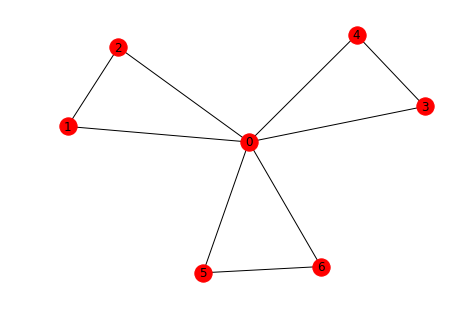

In [122]:
G = nx.Graph()
list_of_edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 2), (3, 4), (5, 6)]
G.add_edges_from(list_of_edges)
nx.draw(G, with_labels=True)

In [45]:
list(nx.find_cliques(G))

[[0, 1, 2], [0, 3, 4], [0, 5, 6]]

[[2, 3, 0], [2, 3, 1]]


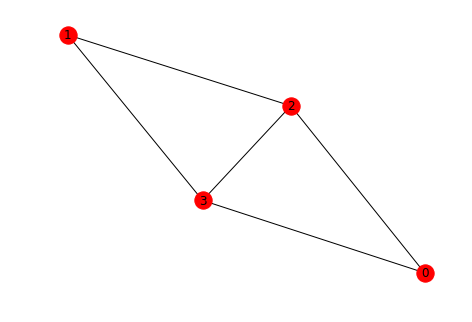

In [46]:
# Facebook friend search, amazon product recommendation.
G = nx.complete_graph(4)
G.remove_edge(0, 1)
nx.draw(G, with_labels=True)
print(list(nx.find_cliques(G)))

#### Link Prediction usign Jaccard coefficient

In [123]:
G = nx.erdos_renyi_graph(30, 0.2)
list(nx.jaccard_coefficient(G))

[(0, 1, 0.16666666666666666),
 (0, 2, 0.0),
 (0, 3, 0.07692307692307693),
 (0, 4, 0.0),
 (0, 5, 0.0),
 (0, 6, 0.0),
 (0, 7, 0.0),
 (0, 8, 0.1111111111111111),
 (0, 9, 0.1111111111111111),
 (0, 10, 0.16666666666666666),
 (0, 11, 0.125),
 (0, 13, 0.125),
 (0, 14, 0.2),
 (0, 15, 0.1),
 (0, 17, 0.0),
 (0, 18, 0.2),
 (0, 19, 0.09090909090909091),
 (0, 20, 0.125),
 (0, 21, 0.125),
 (0, 22, 0.1111111111111111),
 (0, 23, 0.1111111111111111),
 (0, 24, 0.1111111111111111),
 (0, 25, 0.0),
 (0, 26, 0.0),
 (0, 29, 0.0),
 (1, 2, 0.0),
 (1, 3, 0.08333333333333333),
 (1, 4, 0.0),
 (1, 6, 0.0),
 (1, 7, 0.25),
 (1, 8, 0.125),
 (1, 9, 0.0),
 (1, 10, 0.0),
 (1, 11, 0.3333333333333333),
 (1, 12, 0.125),
 (1, 13, 0.14285714285714285),
 (1, 14, 0.25),
 (1, 15, 0.1111111111111111),
 (1, 16, 0.0),
 (1, 17, 0.0),
 (1, 18, 0.0),
 (1, 20, 0.0),
 (1, 21, 0.14285714285714285),
 (1, 22, 0.5),
 (1, 23, 0.0),
 (1, 24, 0.0),
 (1, 25, 0.0),
 (1, 26, 0.0),
 (1, 27, 0.09090909090909091),
 (1, 29, 0.2),
 (2, 3, 0.307692307

### Excersise - 5

Create a recommender for authors by listing the top 5 authors by jaccard coefficient.

In [139]:
jaccard = nx.jaccard_coefficient(authors_graph)

In [ ]:
%%time
d = {}
for u, v, p in jaccard:
    if u in d:
        d[u].append((v, p))
    elif u not in d:
        d[u] = [(v, p)]
    if v in d:
        d[v].append((u, p))
    elif v not in d:
        d[v] = [(u, p)]

In [128]:
reco = {}
for u, w in d.items():
    reco[u] = sorted(w, key=lambda x: x[1], reverse=True)[0:5]

TypeError: 'int' object is not iterable

{'3466': 6,
 '937': 6,
 '5233': 6,
 '8579': 6,
 '10310': 5,
 '15931': 5,
 '17038': 6,
 '18720': 6,
 '19607': 6,
 '1854': 5,
 '4583': 6,
 '9572': 5,
 '10841': 5,
 '13056': 4,
 '14982': 5,
 '16310': 4,
 '19640': 5,
 '23855': 5,
 '24372': 6,
 '24814': 5,
 '5052': 3,
 '899': 4,
 '1796': 4,
 '2287': 4,
 '3096': 3,
 '3386': 4,
 '4472': 4,
 '5346': 4,
 '5740': 4,
 '6094': 4,
 '6376': 4,
 '9124': 4,
 '10235': 4,
 '10427': 4,
 '10597': 4,
 '15159': 4,
 '16148': 3,
 '16741': 4,
 '18235': 4,
 '18549': 4,
 '19297': 4,
 '20511': 4,
 '20595': 4,
 '20613': 4,
 '24371': 2,
 '24559': 4,
 '24731': 4,
 '25102': 4,
 '25271': 4,
 '25396': 4,
 '1658': 5,
 '4822': 5,
 '6864': 5,
 '7689': 4,
 '7926': 5,
 '10268': 5,
 '12971': 5,
 '18600': 5,
 '20421': 5,
 '20886': 5,
 '21048': 5,
 '22393': 5,
 '23186': 5,
 '23214': 5,
 '23298': 5,
 '23945': 5,
 '24939': 5,
 '339': 4,
 '624': 5,
 '3731': 5,
 '4743': 5,
 '5407': 5,
 '6610': 5,
 '6700': 5,
 '8045': 6,
 '9099': 5,
 '9639': 6,
 '9785': 5,
 '12141': 6,
 '15184': 5,

In [50]:
reco

{'1028': [('8541', 0.36363636363636365),
  ('13322', 0.2222222222222222),
  ('8335', 0.14285714285714285),
  ('11898', 0.14285714285714285),
  ('20511', 0.05405405405405406)],
 '25102': [('22528', 0.2857142857142857),
  ('22832', 0.2857142857142857),
  ('17268', 0.2222222222222222),
  ('4241', 0.19047619047619047),
  ('4180', 0.18181818181818182)],
 '13008': [('6815', 0.1),
  ('7209', 0.1),
  ('1508', 0.1),
  ('896', 0.09090909090909091),
  ('8279', 0.09090909090909091)],
 '14037': [('939', 1.0),
  ('1834', 0.5),
  ('5056', 0.5),
  ('19613', 0.3333333333333333),
  ('16940', 0.3333333333333333)],
 '20547': [('3185', 0.3333333333333333),
  ('8666', 0.09090909090909091),
  ('1028', 0.0),
  ('19060', 0.0),
  ('12691', 0.0)],
 '24846': [('23215', 0.3333333333333333),
  ('21024', 0.2),
  ('1028', 0.0),
  ('19060', 0.0),
  ('12691', 0.0)],
 '8710': [('9138', 0.5),
  ('20230', 0.5),
  ('4775', 0.3333333333333333),
  ('20229', 0.3333333333333333),
  ('7095', 0.3333333333333333)],
 '22497': [('5

### Directed Graphs

![title](img/pagerank.png)

In [51]:
G = nx.DiGraph()
G.add_edge(1, 2)
print(G.edges())
# G[1][2]
# G.is_directed()
# type(G)

[(1, 2)]


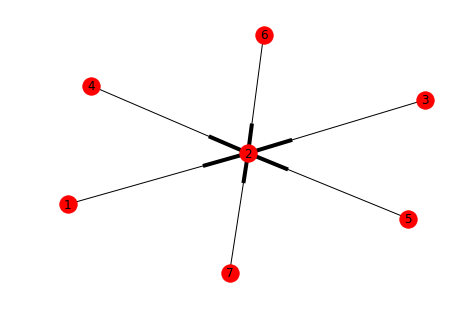

In [52]:
G.add_edges_from([(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)])
nx.draw(G, with_labels=True)

In [53]:
G.in_degree()

{1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}

In [54]:
nx.pagerank(G)

{1: 0.0826448180198328,
 2: 0.5041310918810031,
 3: 0.0826448180198328,
 4: 0.0826448180198328,
 5: 0.0826448180198328,
 6: 0.0826448180198328,
 7: 0.0826448180198328}

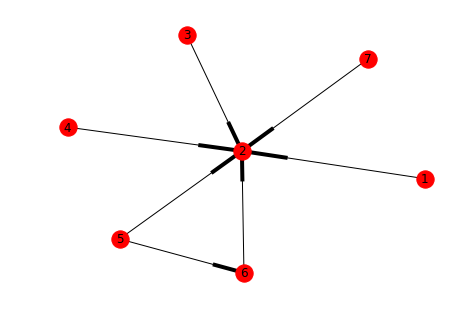

In [55]:
G.add_edge(5, 6)
nx.draw(G, with_labels=True)

In [56]:
nx.pagerank(G)

{1: 0.08024854052495894,
 2: 0.4844028780560986,
 3: 0.08024854052495894,
 4: 0.08024854052495894,
 5: 0.08024854052495894,
 6: 0.11435441931910648,
 7: 0.08024854052495894}

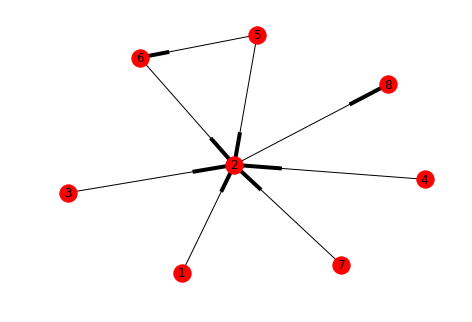

In [57]:
G.add_edge(2, 8)
nx.draw(G, with_labels=True)

In [58]:
nx.pagerank(G)

{1: 0.05378612718073915,
 2: 0.3246687852772877,
 3: 0.05378612718073915,
 4: 0.05378612718073915,
 5: 0.05378612718073915,
 6: 0.0766454192258098,
 7: 0.05378612718073915,
 8: 0.3297551595932067}

### Excersise - 6

Arxiv HEP-TH (high energy physics theory) citation graph is from the e-print arXiv and covers all the citations within a dataset of 27,770 papers with 352,807 edges. If a paper i cites paper j, the graph contains a directed edge from i to j. If a paper cites, or is cited by, a paper outside the dataset, the graph does not contain any information about this.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its HEP-TH section.

* Open the file cit-HepTh.txt and create a directed graph.

```
import csv
citation = nx.DiGraph()
with open('cit-HepTh.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        citation.add_edge(row[0], row[1])
```


* Calculate the page rank of nodes (papers) using nx.pagerank()
* Find the node with max (M) and min (m) page rank score
* Calculate the in degree and out degree of the node M and m.
* Compare the average of page rank score of nodes connected to M and m. (M->node and m->node)
* Open the file cit-HepTh-dates.txt and add date as a node attribute to the citation network.

```
import csv
with open('cit-HepTh-dates.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        citation.add_node(row[0], date=row[1])
```


* Iterate through the nodes and find all the papers published in 2001. (Not all the papers have the data attribute!!!)
* Find the density of the graph using nx.density(G). Is it a sparse or dense graph?
* Find the number of nodes in the largest connected component of the network. (Note: You need to use weakly_connected_components instead of connected_components).

In [59]:
import csv
citation = nx.DiGraph()
with open('cit-HepTh.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        citation.add_edge(row[0], row[1])

In [60]:
%%time
cite = nx.pagerank(citation)

CPU times: user 12.7 s, sys: 603 ms, total: 13.3 s
Wall time: 13.7 s


In [61]:
print(max(cite.items(), key = lambda x:x[1]))
print(min(cite.items(), key = lambda x:x[1]))

('9407087', 0.006238910935211816)
('1007', 1.0884024588311187e-05)


In [62]:
print('in degree of node 9407087:' , citation.in_degree('9407087'))
print('out degree of node 9407087:' , citation.out_degree('9407087'))

print('in degree of node 9305019:' , citation.in_degree('9305019'))
print('out degree of node 9305019:' , citation.out_degree('9305019'))

score, count = 0, 0
for node in citation['9407087']:
    score += cite[node]
    count += 1
print(score/count)


score, count = 0, 0
for node in citation['9305019']:
    score += cite[node]
    count += 1
print(score/count)

in degree of node 9407087: 1299
out degree of node 9407087: 9
in degree of node 9305019: 0
out degree of node 9305019: 5
0.0018861031447091406
0.00010476050381138533


In [63]:
import csv
with open('cit-HepTh-dates.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        citation.add_node(row[0], date=row[1])

In [64]:
papers_2001 = []
for node, attr in citation.nodes(data=True):
    if 'date' in attr:
        if attr['date'][0:4] == '2001':
            papers_2001.append(node)
print(len(papers_2001))

5185


In [65]:
# nx.density(nx.erdos_renyi_graph(100, 0.4))
nx.density(citation)

8.684001476782623e-05

In [66]:
print([len(c) for c in sorted(nx.weakly_connected_components(citation), key=len, reverse=True)])

[27400, 10, 8, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1